# Notebook to analyze data

In [ ]:
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np

In [ ]:
stats = pd.read_csv("../data/output/statistics.csv", sep="\t")
stats["module"] = [x.split("_")[1][:-1] for x in stats["Transcript_ID"]]
stats

In [ ]:
# rimuoviamo i trascritti fatti a partire da whisper o dal manuale
stats = stats[~stats["Transcript_ID"].isin(["03_StraParlaA_man", "03_StraParlaA_whi",
														"03_StraParlaB_man", "03_StraParlaB_whi",
														"03_StraParlaC_man", "03_StraParlaC_whi"])]

# stats = stats_filtrato [~stats["Esperto"].isin(["no"])]
# stats_filtrato

# A. Domande per capire come sono fatti i dati

## [1] Quanto hanno trascritto i nostri annotatori?
1. in termini di tempo
2. in termini di token

## [2] Cosa hanno trascritto i nostri annotatori?

1. Numero di token
2. Numero di unità di trascrizione
3. Durata media delle unità di trascrizione
4. Numero medio di token delle unità di trascrizione

-------------------------------------------

## Tokens per minute across transcript

## numero di token trascritti





### Isoliamo solo i token linguistici (togliamo shortpauses e token metalinguistici)


In [21]:
# TUTTI I TOKEN
# TODO: forse bisogna sostituire gli 0 con N/A nel dataframe?
avg_per_minute = stats_filtrato[["module", "Tipo"]+[f"tokens_per_minute::{i}" for i in range(0,3)]].replace(0, np.nan).groupby(["module", "Tipo"]).mean()
#avg_per_minute_ling = stats_filtrato[["module", "Tipo"]+[f"ling_tokens_per_min::{i}" for i in range(0,3)]].replace(0, np.nan).groupby(["module", "Tipo"]).mean()

In [22]:
avg_per_minute

tokens_per_minute::0  tokens_per_minute::1  \
module    Tipo                                                           
ParlaBO   From-Scratch                161.000000            342.000000   
          Revised                     159.500000            338.500000   
          Whisper-Assisted            155.500000            332.000000   
Pasti     From-Scratch                166.000000            359.000000   
          Revised                     171.000000            394.000000   
          Whisper-Assisted            170.000000            371.000000   
StraParla From-Scratch                159.666667            363.666667   
          Revised                     159.333333            365.666667   
          Whisper-Assisted            180.000000            377.000000   

                            tokens_per_minute::2  
module    Tipo                                    
ParlaBO   From-Scratch                508.000000  
          Revised                     494.000000  
          Whisper-Assisted            494.000000  
Pasti     From-Scratch                535.000000  
          Revised                     592.000000  
          Whisper-Assisted            547.000000  
StraParla From-Scratch                542.666667  
          Revised                     522.666667  
          Whisper-Assisted            564.500000

In [ ]:
delta_pairs = [
    ("Revised", "From-Scratch"),
    ("Revised", "Whisper-Assisted"),
    # Add more pairs as needed
]
modules = ["ParlaBO", "Pasti", "StraParla"]

# Create an empty list to store rows
rows = []

# Iterate over module names
for module in modules:
    for t1, t2 in delta_pairs:
        row = [module, f"{t1} - {t2}"]
        for i in range(0, 3):
            diff = avg_per_minute.loc[(module, t1), f"tokens_per_minute::{i}"] - avg_per_minute.loc[(module, t2), f"tokens_per_minute::{i}"]
            row.append(diff)
        rows.append(row)

# Create a new DataFrame
columns = avg_per_minute.columns # Column names
# print(columns)
df_deltas = pd.DataFrame(rows, columns=["module", "delta"].extend(columns))
df_deltas

KeyError: ('StraParla', 'Revised')

In [ ]:
delta_pairs = [
    ("Revised", "From-Scratch"),
    ("Revised", "Whisper-Assisted"),
    # Add more pairs as needed
]
modules = ["ParlaBO", "Pasti", "StraParla"]

# Create an empty list to store rows
rows = []

# Iterate over module names
for module in modules:
    for t1, t2 in delta_pairs:
        row = [module, f"{t1} - {t2}"]
        for i in range(0, 3):
            diff = avg_per_minute_ling.loc[(module, t1), f"ling_tokens_per_min::{i}"] - avg_per_minute_ling.loc[(module, t2), f"ling_tokens_per_min::{i}"]
            row.append(diff)
        rows.append(row)

# Create a new DataFrame
columns = avg_per_minute.columns # Column names
# print(columns)
df_deltas = pd.DataFrame(rows, columns=["module", "delta"].extend(columns))
df_deltas

,0,1,2,3,4
0,ParlaBO,Revised - From-Scratch,-3.000000,-2.500000,-10.500000
1,ParlaBO,Revised - Whisper-Assisted,3.000000,6.166667,2.833333
2,Pasti,Revised - From-Scratch,6.833333,19.166667,34.666667
3,Pasti,Revised - Whisper-Assisted,5.166667,22.500000,39.000000
4,StraParla,Revised - From-Scratch,-2.700000,0.600000,10.700000
5,StraParla,Revised - Whisper-Assisted,-22.500000,-16.500000,-34.250000


## il numero di minuti trascritti

In [ ]:
# Numero di transcription units
avg_num_tu = stats_filtrato[["module", "transcription_type"]+[f"num_tu::{i}" for i in range(0,3)]].replace(0, np.nan).groupby(["module", "transcription_type"]).mean()
avg_duration_per_minute = stats_filtrato[["module", "transcription_type"]+[f"avg_duration_per_min::{i}" for i in range(0,3)]].replace(0, np.nan).groupby(["module", "transcription_type"]).mean()
avg_overlaps = stats_filtrato[["module", "transcription_type"]+[f"num_overlaps"]].replace(0, np.nan).groupby(["module", "transcription_type"]).mean()


Il numero di unità di trascrizione

In [ ]:
delta_pairs = [
    ("Revised", "From-Scratch"),
    ("Revised", "Whisper-Assisted"),
    # Add more pairs as needed
]
modules = ["ParlaBO", "Pasti", "StraParla"]

# Create an empty list to store rows
rows = []

# Iterate over module names
for module in modules:
    for t1, t2 in delta_pairs:
        row = [module, f"{t1} - {t2}"]
        for i in range(0, 3):
            diff = avg_num_tu.loc[(module, t1), f"num_tu::{i}"] - avg_num_tu.loc[(module, t2), f"num_tu::{i}"]
            row.append(diff)
        rows.append(row)

# Create a new DataFrame
columns = avg_num_tu.columns # Column names
# print(columns)
df_deltas = pd.DataFrame(rows, columns=["module", "delta"].extend(columns))
df_deltas

,0,1,2,3,4
0,ParlaBO,Revised - From-Scratch,7.000000,14.000000,23.500000
1,ParlaBO,Revised - Whisper-Assisted,12.500000,26.000000,38.000000
2,Pasti,Revised - From-Scratch,-0.500000,-1.000000,2.000000
3,Pasti,Revised - Whisper-Assisted,0.500000,2.000000,3.000000
4,StraParla,Revised - From-Scratch,-1.000000,-1.666667,-4.333333
5,StraParla,Revised - Whisper-Assisted,2.333333,2.333333,-3.833333


La durata media in minuti delle unità di trascrizione

In [ ]:
delta_pairs = [
    ("Revised", "From-Scratch"),
    ("Revised", "Whisper-Assisted"),
    # Add more pairs as needed
]
modules = ["ParlaBO", "Pasti", "StraParla"]

# Create an empty list to store rows
rows = []

# Iterate over module names
for module in modules:
    for t1, t2 in delta_pairs:
        row = [module, f"{t1} - {t2}"]
        for i in range(0, 3):
            diff = avg_duration_per_minute.loc[(module, t1), f"avg_duration_per_min::{i}"] - avg_duration_per_minute.loc[(module, t2), f"avg_duration_per_min::{i}"]
            row.append(diff)
        rows.append(row)

# Create a new DataFrame
columns = avg_duration_per_minute.columns # Column names
# print(columns)
df_deltas = pd.DataFrame(rows, columns=["module", "delta"].extend(columns))
df_deltas

,0,1,2,3,4
0,ParlaBO,Revised - From-Scratch,-0.521561,-0.494058,-0.624793
1,ParlaBO,Revised - Whisper-Assisted,-1.381709,-1.581181,-1.598048
2,Pasti,Revised - From-Scratch,-0.001497,0.045944,0.017882
3,Pasti,Revised - Whisper-Assisted,-0.054443,-0.021610,0.002669
4,StraParla,Revised - From-Scratch,0.040628,-0.081657,-0.141954
5,StraParla,Revised - Whisper-Assisted,-0.285680,-0.076066,0.039315


Numero di overlap

In [ ]:
delta_pairs = [
    ("Revised", "From-Scratch"),
    ("Revised", "Whisper-Assisted"),
    # Add more pairs as needed
]
modules = ["ParlaBO", "Pasti", "StraParla"]

# Create an empty list to store rows
rows = []

# Iterate over module names
for module in modules:
    for t1, t2 in delta_pairs:
        row = [module, f"{t1} - {t2}"]
        diff = avg_overlaps.loc[(module, t1), f"num_overlaps"] - avg_overlaps.loc[(module, t2), f"num_overlaps"]
        row.append(diff)
        rows.append(row)

# print(columns)
df_deltas = pd.DataFrame(rows, columns=["module", "delta", "value"])
df_deltas

,module,delta,value
0,ParlaBO,Revised - From-Scratch,28.000000
1,ParlaBO,Revised - Whisper-Assisted,75.000000
2,Pasti,Revised - From-Scratch,44.000000
3,Pasti,Revised - Whisper-Assisted,-23.000000
4,StraParla,Revised - From-Scratch,-3.333333
5,StraParla,Revised - Whisper-Assisted,2.000000



3. Quanto si somigliano le due trascrizioni FS/WA? In termini di:


   1. il numero di unità di trascrizione
      1. proviamo ad escludere le unità che contengono solo token metalinguistici
   2. la durata media in minuti delle unità di trascrizione
      1. proviamo ad escludere le unità che contengono solo token metalinguistici
   3. la durata media in minuti delle unità di trascrizione
      1. proviamo ad escludere le unità che contengono solo token metalinguistici
   4. numero di span con overlap
   5. numero di span con pace variato
   6. numero di token con pattern intonativo
   7. numero di span con volume variato
   8. numero di token con allungamenti

2. Dimensione dell'intersezione (guardiamo token diversi)

4. Calcoliamo Delta-s(Gold, FS), Delta-w(Gold, WA) su:
   1. il numero di unità di trascrizione varia tra fase FS e fase WA?
      1. proviamo ad escludere le unità che contengono solo token metalinguistici
   2. la durata media in ms delle unità di trascrizione varia tra fase FS e fase WA?
      1. proviamo ad escludere le unità che contengono solo token metalinguistici
   3. la durata media in ms delle unità di trascrizione varia tra fase FS e fase WA?
      1. proviamo ad escludere le unità che contengono solo token metalinguistici
   4. numero di span con overlap
   5. numero di span con pace variato
   6. numero di token con pattern intonativo
   7. numero di span con volume variato
   8. numero di token con allungamenti

5. MISMATCH (per esperti e per non esperti) sul livello ortografico
   1. numero di token che mismatchano nelle due condizioni (FS e WA):
      1. li classifichiamo a mano (es. quante congiunzioni? quanti filler? quante shortpauses?...)
      2. valutazione "gravità" del mismatch (presenza/assenza di un token, stesso lemma, token diversi...)
      3. edit distance tra i token mismatchanti per valutare se ci sono typos (es. "parlare" vs "prlare")

6. MATCH
   1. calcolo accuracy (e per l'overlap che è di tipo relazionale UAS-LAS (Unlabeled attachment score e labeled attachment score)) per ogni feature jefferson: differenza tra accuratezza dell'annotatore FS rispetto al Gold e accuratezza dell'annotatore WA rispetto al gold.
   2. media delle accuratezze per file e media delle accuratezze per feature
   3. per i token che matchano a inizio e fine di unità di trascrizione, valutazione della precisione di inizio/fine unità di trascrizione (non si può fare in termini di accuracy perché sono numeri reali)
   4. Relazioni tra tipi di mismatch per le features. Ci sono features che sono più predittive di altre, sulla possibilità che esistano mismatch in altre colonne? Per esempio: avere una bassa accuratezza sui prolungamenti è predittivo rispetto ad avere una bassa accuratezza sul volume della voce?

7. valutazione precisione unità a prescindere dal contenuto
   1. Creazione grafo di corrispondenza delle unità attribuite ad ogni parlante per i vari annotatori.

  

<Figure size 1200x600 with 0 Axes>

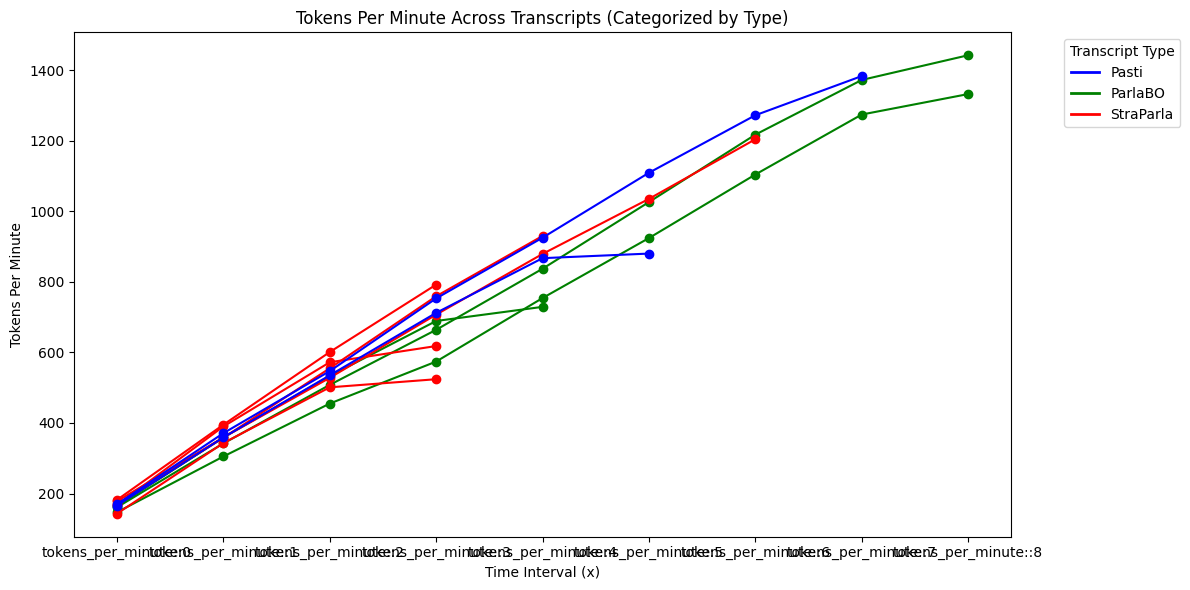

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Select relevant columns: Transcript_ID and tokens_per_minute::x (where x = 0 to 9)
tokens_cols = [f"tokens_per_minute::{i}" for i in range(10)]
stats = stats[~stats["Tipo"].isin(["Revised"])]
df_subset = stats[['Transcript_ID'] + tokens_cols].set_index('Transcript_ID')

# Convert to numeric values (handling any non-numeric data gracefully)
# df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Replace exact 0 values with NaN to indicate missing data
df_subset = df_subset.replace(0, np.nan)

# Plot the updated data with lines ending at missing points
# Define colors based on Transcript_ID categories
color_map = {
    "Pasti": "blue",
    "ParlaBO": "green",
    "StraParla": "red"
}

# Assign colors to each Transcript_ID based on its category
df_colors = []
for transcript in df_subset.index:
    if "Pasti" in transcript:
        df_colors.append(color_map["Pasti"])
    elif "ParlaBO" in transcript:
        df_colors.append(color_map["ParlaBO"])
    elif "StraParla" in transcript:
        df_colors.append(color_map["StraParla"])
    else:
        df_colors.append("gray")  # Default color for other cases

# Plot the data with category-based colors
plt.figure(figsize=(12, 6))
ax = df_subset.T.plot(title="Tokens Per Minute Across Transcripts",
                    figsize=(12, 6), marker='o', linestyle='-', color=df_colors)

# Customize labels
plt.xlabel("Time Interval (x)")
plt.ylabel("Tokens Per Minute")

# Create custom legend
legend_elements = [
    Line2D([0], [0], color="blue", lw=2, label="Pasti"),
    Line2D([0], [0], color="green", lw=2, label="ParlaBO"),
    Line2D([0], [0], color="red", lw=2, label="StraParla")
]
plt.legend(handles=legend_elements, title="Transcript Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
